# ENGG2400 Assignment 1 Scratchpad

Not to be submitted as a report, just for generating graphs


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

## Tensile Component

In [15]:
# Importing Data

# Column Names
names = ['Time / s', 'Load / kN', 'Gauge Extension / mm', 'Overall Extension / mm']

tensile1 = pd.read_csv('3 - Tensile.csv', header=None, names=names, skiprows=4, skipfooter=321)
tensile2 = pd.read_csv('3 - Tensile.csv', header=None, names=names, skiprows=16)

/var/folders/l_/9d2vdrhj63n0sgtgpvt0vmgc0000gn/T/ipykernel_5719/624136385.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  tensile1 = pd.read_csv('3 - Tensile.csv', header=None, names=names, skiprows=4, skipfooter=321)


E =  198.02673598401088  +/-  11.519770090329821 GPA


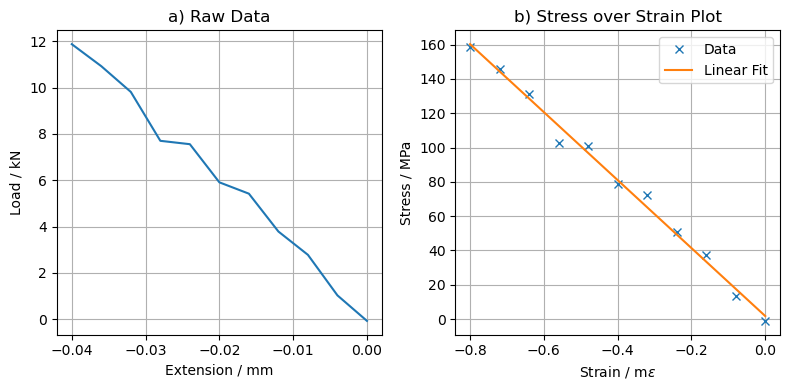

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Raw Data Plot
ax1.plot(tensile1['Gauge Extension / mm'], tensile1['Load / kN'])
ax1.set_title('a) Raw Data')
ax1.set_xlabel('Extension / mm')
ax1.set_ylabel('Load / kN')
ax1.grid()

# Proccessed Data
diameter = (9.84 + 9.69) / 2 * 1E-3 # average of upper and lower tolerance, converted to value in m
L = 50 # length in mm

A  = np.pi * diameter**2 / 4

y1 = tensile1['Load / kN'] * 1000 / A # convert to N, divide by area
x1 = tensile1['Gauge Extension / mm'] / L # convert to \eps

ax2.plot(x1*1000, y1/1E6, label='Data', marker='x', linestyle='')

ax2.set_ylabel('Stress / MPa')
ax2.set_xlabel('Strain / m$\epsilon$')
ax2.set_title('b) Stress over Strain Plot')
ax2.grid()
   
mod = scipy.stats.linregress(x1, y1)
x_space = np.linspace(np.min(x1), np.max(x1), 30)

ax2.plot(x_space*1E3, (mod.intercept + mod.slope*x_space)*1E-6, label='Linear Fit')
ax2.legend()

E = np.abs(mod.slope)*1E-9
dE = 1.96*np.abs(mod.stderr)*1E-9

print('E = ', E , ' +/- ', dE, 'GPA')

plt.tight_layout()
#plt.savefig('tensile_1.pdf', transparent=True)
plt.savefig('tensile_1.png', transparent=True, dpi=600)

Yield Stress =  448.2465592919465 , Ultimate Stress =  482.77636573606253  GPa


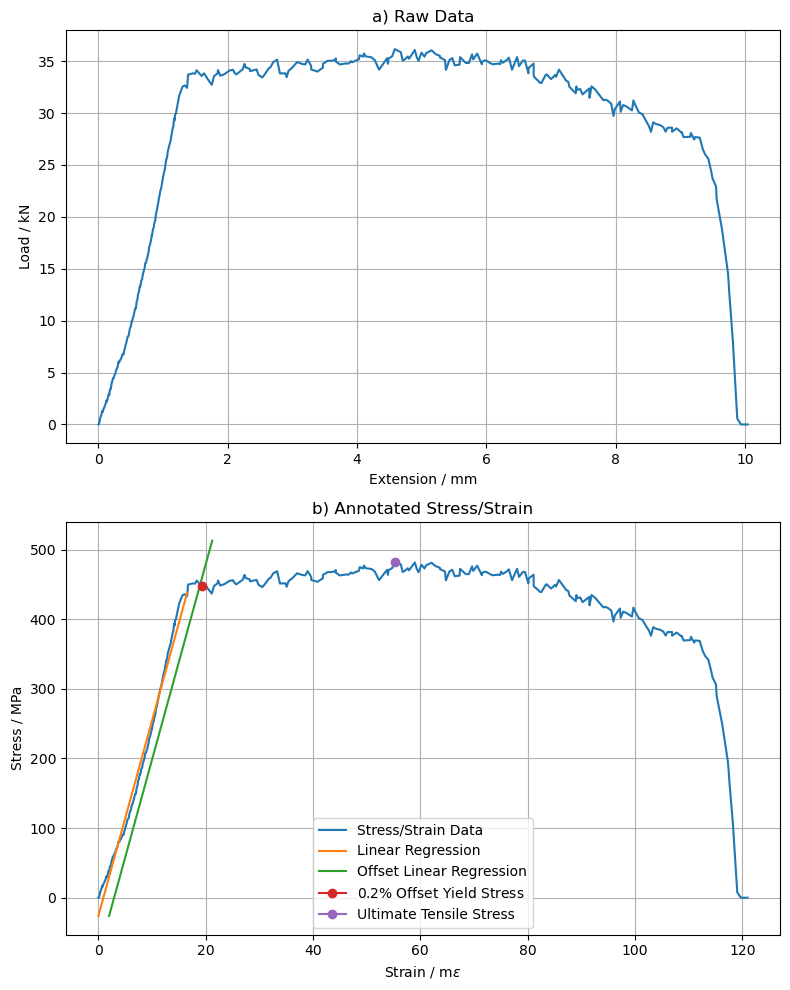

In [17]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 10))

# Raw Data Plot

ax1.plot(tensile2['Overall Extension / mm'], tensile2['Load / kN'])

ax1.set_title('a) Raw Data')
ax1.set_ylabel('Load / kN')
ax1.set_xlabel('Extension / mm')
ax1.grid()

# Proccssed Plot
L = 83 # length in mm
regress_index = 125

y2 = tensile2['Load / kN'] * 1000 / A # from other code
x2 = tensile2['Overall Extension / mm'] / L

ax2.set_title('b) Annotated Stress/Strain')
ax2.set_ylabel('Stress / MPa')
ax2.set_xlabel('Strain / m$\epsilon$')
ax2.grid()

ax2.plot(x2*1E3, y2*1E-6, label='Stress/Strain Data')

mod = scipy.stats.linregress(x2[:regress_index], y2[:regress_index])

ax2.plot(x2[:regress_index]*1E3, (mod.slope*x2[:regress_index] + mod.intercept)*1E-6, label='Linear Regression')
ax2.plot(x2[:regress_index+5]*1E3 + 2, (mod.slope*x2[:regress_index+5] + mod.intercept)*1E-6, label='Offset Linear Regression')

yield_index = 129; yield_stress = y2[yield_index]*1E-6
ax2.plot(x2[yield_index]*1E3, y2[yield_index]*1E-6, label='$0.2 \%$ Offset Yield Stress', marker='o')

ultimate_index = np.argmax(y2); ultimate_stress = y2[ultimate_index]*1E-6
ax2.plot(x2[ultimate_index]*1E3, y2[ultimate_index]*1E-6, label='Ultimate Tensile Stress', marker='o')

ax2.legend()

# misc stuff
plt.tight_layout()
#plt.savefig('tensile_2.pdf', transparent=True)
plt.savefig('tensile_2.png', transparent=True, dpi=600)

print('Yield Stress = ', yield_stress, ', Ultimate Stress = ', ultimate_stress, ' GPa')

## Torsion Component

In [18]:
#--------------------------------------------------- Importing Data, defining constants

# Column Names
names = ['Time / s', 'Gauge Angle', 'Angle', 'Torque / Nm']

torsion1 = pd.read_csv('3 - Torsion.csv', header=None, names=names, skiprows=4, skipfooter=81)
torsion2 = pd.read_csv('3 - Torsion.csv', header=None, names=names, skiprows=16)

# Structural Constants
l = 0.076 # length in m
D = 0.006 # diameter in m

# Derived Structural constants
r =  D / 2
J = np.pi * r**4 / 2

def tau_func(T):
    return T * r / J

def gamma_func(theta):
    return theta * r / l

/var/folders/l_/9d2vdrhj63n0sgtgpvt0vmgc0000gn/T/ipykernel_5719/240970447.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  torsion1 = pd.read_csv('3 - Torsion.csv', header=None, names=names, skiprows=4, skipfooter=81)


G =  121.50501797017739  +/-  4.53004138235531  GPa


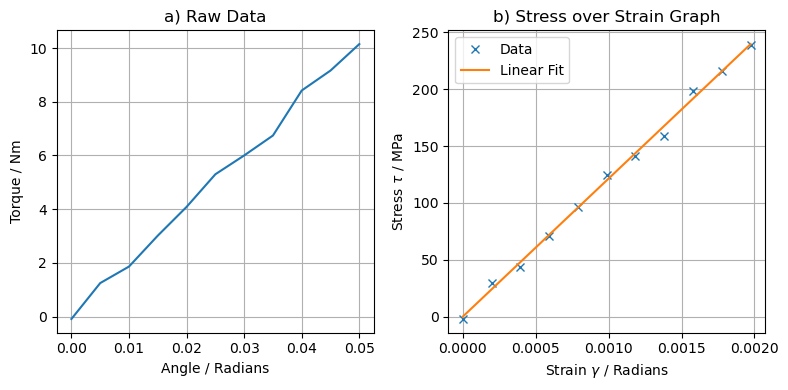

In [19]:
#--------------------------------------------------- First Dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

#------------------------------- Raw Data Plot
ax1.plot(torsion1['Gauge Angle'], torsion1['Torque / Nm'])
ax1.set_title('a) Raw Data')
ax1.set_xlabel('Angle / Radians')
ax1.set_ylabel('Torque / Nm')
ax1.grid()

#------------------------------- Regression Plot
tau = tau_func(torsion1['Torque / Nm'] )
gamma = gamma_func(torsion1['Gauge Angle'])

# Plotting Stress/Strain, MPa v Radians
ax2.plot(gamma, tau*1E-6, label='Data', marker='x', linestyle='')

# Linear Regression
mod = scipy.stats.linregress(gamma, tau)
ax2.plot(gamma, (mod.intercept + mod.slope*gamma)*1E-6, label='Linear Fit')

# Getting G
G = mod.slope*1E-9
dG = 1.96*mod.stderr*1E-9
print('G = ', G, ' +/- ', dG, ' GPa')

# Formatting Plot
ax2.set_title('b) Stress over Strain Graph')
ax2.set_xlabel('Strain $\gamma$ / Radians')
ax2.set_ylabel('Stress $\\tau$ / MPa')
ax2.grid()
ax2.legend()
plt.tight_layout()

#plt.savefig('torsion_1.pdf', transparent=True)
#plt.savefig('torsion_1.png', transparent=True, dpi=600)

Yield Stress =  456.3620627472051  MPa,  Ultimate Stress =  513.8700488510766  MPa


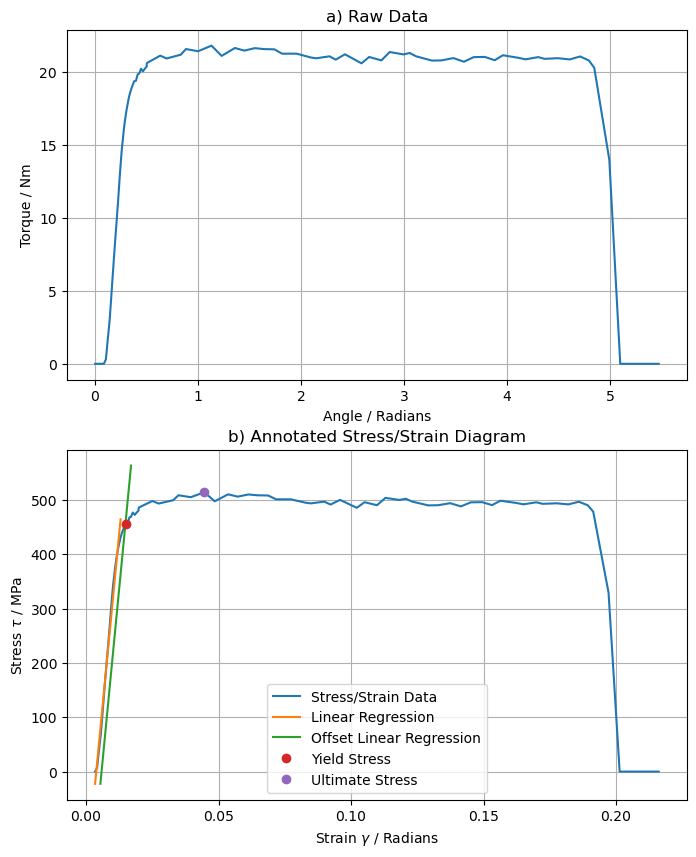

In [20]:
#--------------------------------------------------- Second Dataset

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 10))

#------------------------------- Raw Data Plot
ax1.plot(torsion2['Angle'],  torsion2['Torque / Nm'] )

# formatting
ax1.set_title('a) Raw Data')
ax1.set_ylabel('Torque / Nm')
ax1.set_xlabel('Angle / Radians')
ax1.grid()

#------------------------------- Regression Plots
tau = tau_func(torsion2['Torque / Nm'] )
gamma = gamma_func(torsion2['Angle'])

# Skips this many datapoints at the start of the plots: cuts out zeroed datapoints.
start_index = 5
ax2.plot(gamma[start_index:], tau[start_index:]*1E-6, label='Stress/Strain Data')

#Initial Regression
regress_index = 20
res = scipy.stats.linregress(gamma[start_index:regress_index], tau[start_index:regress_index])
ax2.plot(gamma[start_index:regress_index], (gamma[start_index:regress_index]*res.slope + res.intercept)*1E-6, label='Linear Regression')

#Offset Regression
offset_float = 0.002
ax2.plot(gamma[start_index:regress_index+3]+offset_float, (gamma[start_index:regress_index+3]*res.slope + res.intercept)*1E-6, label='Offset Linear Regression')

#Yield Point
yield_index = 22
ax2.plot(gamma[yield_index], tau[yield_index]*1E-6, label='Yield Stress', marker='o', linestyle='')

#Ultimate Point
ultimate_index = np.argmax(tau)
ax2.plot(gamma[ultimate_index], tau[ultimate_index]*1E-6, label='Ultimate Stress', marker='o', linestyle='')

print('Yield Stress = ', tau[yield_index]*1E-6,' MPa,  Ultimate Stress = ', tau[ultimate_index]*1E-6, ' MPa')

# Formatting
ax2.set_title('b) Annotated Stress/Strain Diagram')
ax2.set_xlabel('Strain $\gamma$ / Radians')
ax2.set_ylabel('Stress $\\tau$ / MPa')
ax2.grid()
ax2.legend()

plt.savefig('torsion_2.pdf', transparent=True)
plt.savefig('torsion_2.png', transparent=True, dpi=600)
